<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/training_models/heart_disease.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting notebook generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

# Predict Heart Disease

In this notebook, you'll use a small [dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) provided by the Cleveland Clinic Foundation for Heart Disease. 

Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease.

Below is a description of each column.

|  Column  |                           Description                          |  Feature Type  | Data Type |
|:--------:|:--------------------------------------------------------------:|:--------------:|:---------:|
| Age      | Age in years                                                   | Numerical      | integer   |
| Sex      | (1 = male; 0 = female)                                         | Categorical    | integer   |
| CP       | Chest pain type (0, 1, 2, 3, 4)                                | Categorical    | integer   |
| Trestbpd | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical      | integer   |
| Chol     | Serum cholestoral in mg/dl                                     | Numerical      | integer   |
| FBS      | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)        | Categorical    | integer   |
| RestECG  | Resting electrocardiographic results (0, 1, 2)                 | Categorical    | integer   |
| Thalach  | Maximum heart rate achieved                                    | Numerical      | integer   |
| Exang    | Exercise induced angina (1 = yes; 0 = no)                      | Categorical    | integer   |
| Oldpeak  | ST depression induced by exercise relative to rest             | Numerical      | float     |
| Slope    | The slope of the peak exercise ST segment                      | Numerical      | integer   |
| CA       | Number of major vessels (0-3) colored by flourosopy            | Numerical      | integer   |
| Thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect            | Categorical    | string    |
| Target   | Diagnosis of heart disease (1 = true; 0 = false)               | Classification | integer   |

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Python version: 3.7.3


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = "retina"
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

# You may add other imports here as needed
# YOUR CODE HERE

scikit-learn version: 0.22.2.post1


## Step 1: loading the data

### Question

Load the dataset into a pandas DataFrame named `df_heart`.

In [4]:
csv_url = "https://raw.githubusercontent.com/bpesquet/machine-learning-katas/master/datasets/heart.csv"

df_heart = pd.read_csv(csv_url)

In [5]:
print(f"df_heart: {df_heart.shape}")

assert df_heart.shape == (301, 14)

df_heart: (301, 14)


## Step 2: prepare the data

### Question

Use the following cells to discover data.

In [6]:
# Print info about the dataset

df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [7]:
# Print the first 10 data samples

df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [8]:
# # Print descriptive statistics for all numerical attributes

df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.571429,0.677741,3.126246,131.684385,246.817276,0.146179,0.996678,149.308970,0.328904,1.061462,1.594684,0.677741,0.275748
std,9.041702,0.468120,1.008634,17.709415,52.186619,0.353874,0.988259,22.953015,0.470597,1.167295,0.617931,0.937623,0.447634
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


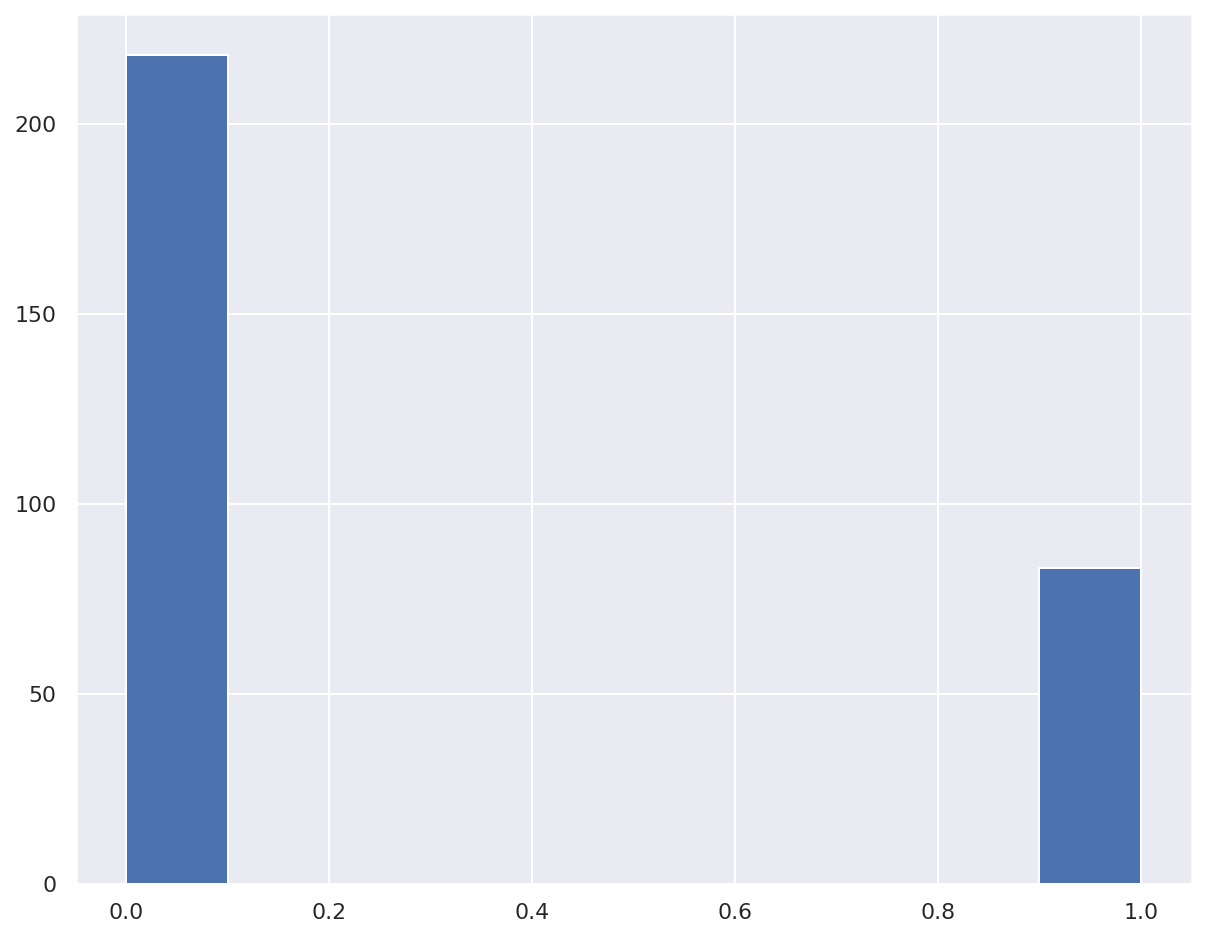

In [9]:
# Print distribution of target values

plt.hist(df_heart['target']);

### Question

Use the following cells to prepare data for training:
- Split data between training and test sets with a 20% ratio.
- Store inputs and labels in the `x_train` and `y_train` variables.
- Preprocess training input data as needed.

In [10]:
# Split dataset between training and test
lim = int(0.8*len(df_heart))
df_train = df_heart.iloc[:lim, :]
df_test = df_heart.iloc[lim:, :]

In [11]:
print(f"Training dataset: {df_train.shape}")
print(f"Test dataset: {df_test.shape}")

assert df_train.shape == (240, 14)
assert df_test.shape == (61, 14)

Training dataset: (240, 14)
Test dataset: (61, 14)


In [12]:
# Split training dataset between inputs and target

y_train = df_train['target']
df_x_train = df_train
y_test = df_test['target']
df_x_test = df_test

del df_x_train['target']
del df_x_test['target']

In [13]:
print(f"Training data: {df_x_train.shape}")
print(f"Training labels: {y_train.shape}")

assert df_x_train.shape == (240, 13)
assert y_train.shape == (240,)

Training data: (240, 13)
Training labels: (240,)


In [14]:
# Print numerical and categorical features

df_x_train.dtypes == 'object'

# Print all values for the "thal" feature

df_x_train['thal'].unique()

array(['fixed', 'normal', 'reversible'], dtype=object)

In [15]:
# Use pipelines to preprocess data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

step1 = ColumnTransformer(
    [
    ('onehot', OneHotEncoder(), ['thal'])
    ],
    remainder='passthrough')

pipe = Pipeline([('onehot', step1)])

x_train = pipe.fit_transform(df_x_train)
x_test = pipe.fit_transform(df_x_test)
print(df_x_train.iloc[0, :])

age            63
sex             1
cp              1
trestbps      145
chol          233
fbs             1
restecg         2
thalach       150
exang           0
oldpeak       2.3
slope           3
ca              0
thal        fixed
Name: 0, dtype: object


In [16]:
# Print preprocessed data shape and first sample
print(f"x_train: {x_train.shape}")
print(x_train[0])

assert x_train.shape == (240, 15)

x_train: (240, 15)
[  1.    0.    0.   63.    1.    1.  145.  233.    1.    2.  150.    0.
   2.3   3.    0. ]


## Step 3: train and evaluate a model

### Question

Use the following cells to:
- Train a SGD classifier on the training data.
- Evaluate its accuracy using K-fold cross-validation.
- Compute the precision, recall and f1-score metrics.
- Plot its confusion matrix and ROC curve.

In [17]:
# Fit a SGD classifier to the training set
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, confusion_matrix

model = SGDClassifier()
%timeit model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

1.17 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
# Use cross-validation to evaluate accuracy, using 3 folds
# Store the result in the cv_acc variable
from sklearn.metrics import accuracy_score

cv_acc = []
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(x_train):
    X_test = x_train[test_index]
    Y_test = y_train[test_index]
    
    y_pred = model.predict(X_test)
    cv_acc += [accuracy_score(Y_test, y_pred)]

In [19]:
print(f"CV accuracy: {cv_acc}")

assert np.mean(cv_acc) > 0.70

CV accuracy: [0.7875, 0.7625, 0.7125]


In [20]:
# Plot the confusion matrix for a model and a dataset
def plot_conf_mat(model, x, y):
    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        display = plot_confusion_matrix(
            model, x, y, values_format="d", cmap=plt.cm.Blues
        )

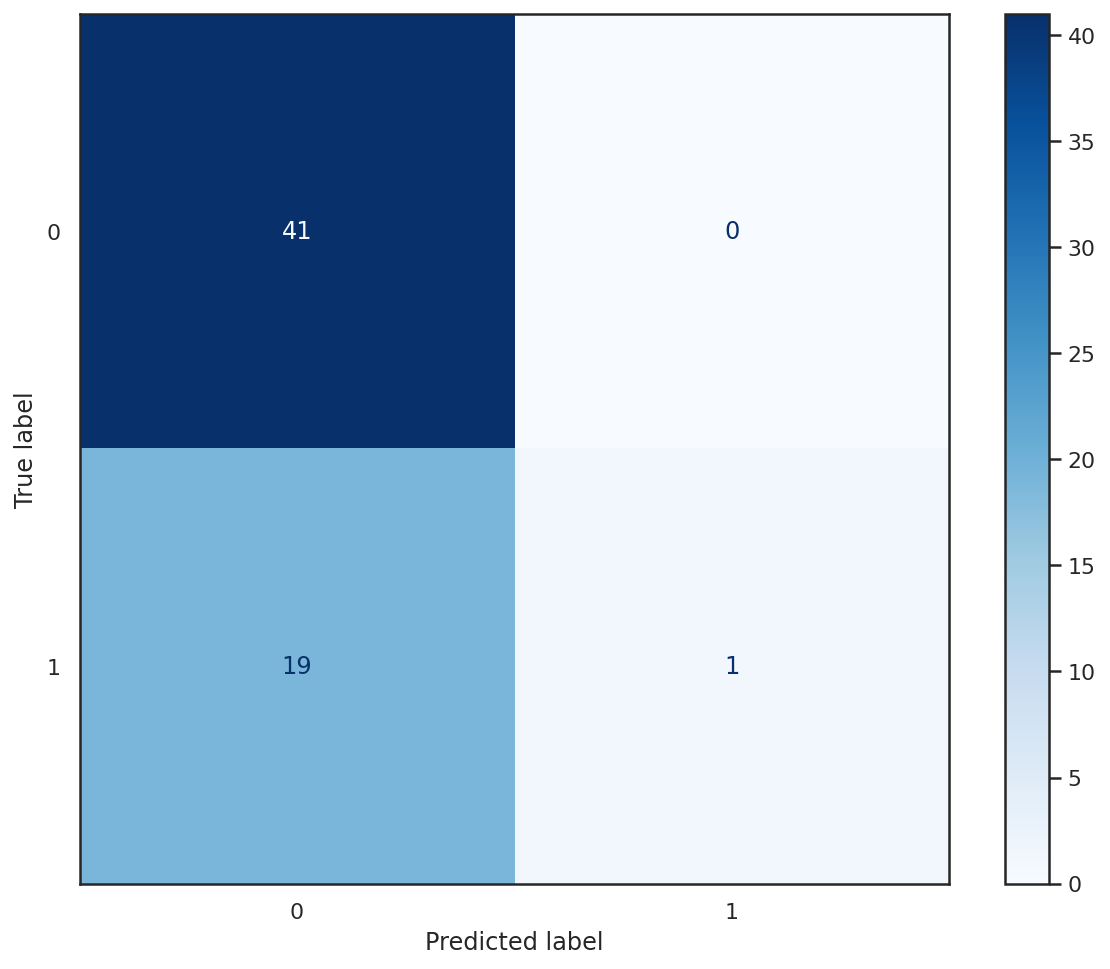

In [21]:
# Plot confusion matrix for the SGD classifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plot_conf_mat(model, x_test, y_test)

In [22]:
# Compute precision, recall and f1-score for the SGD classifier
print('precision', precision_score(y_test, y_test_pred))
print('recall', recall_score(y_test, y_test_pred))
print('f1_score', f1_score(y_test, y_test_pred))

precision 1.0
recall 0.05
f1_score 0.09523809523809523


## Bonus

Train another classifier and plot ROC curves for both.

In [23]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
%timeit model2.fit(x_train, y_train)
y_test_pred2 = model2.predict(x_test)

100 ms ± 5.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


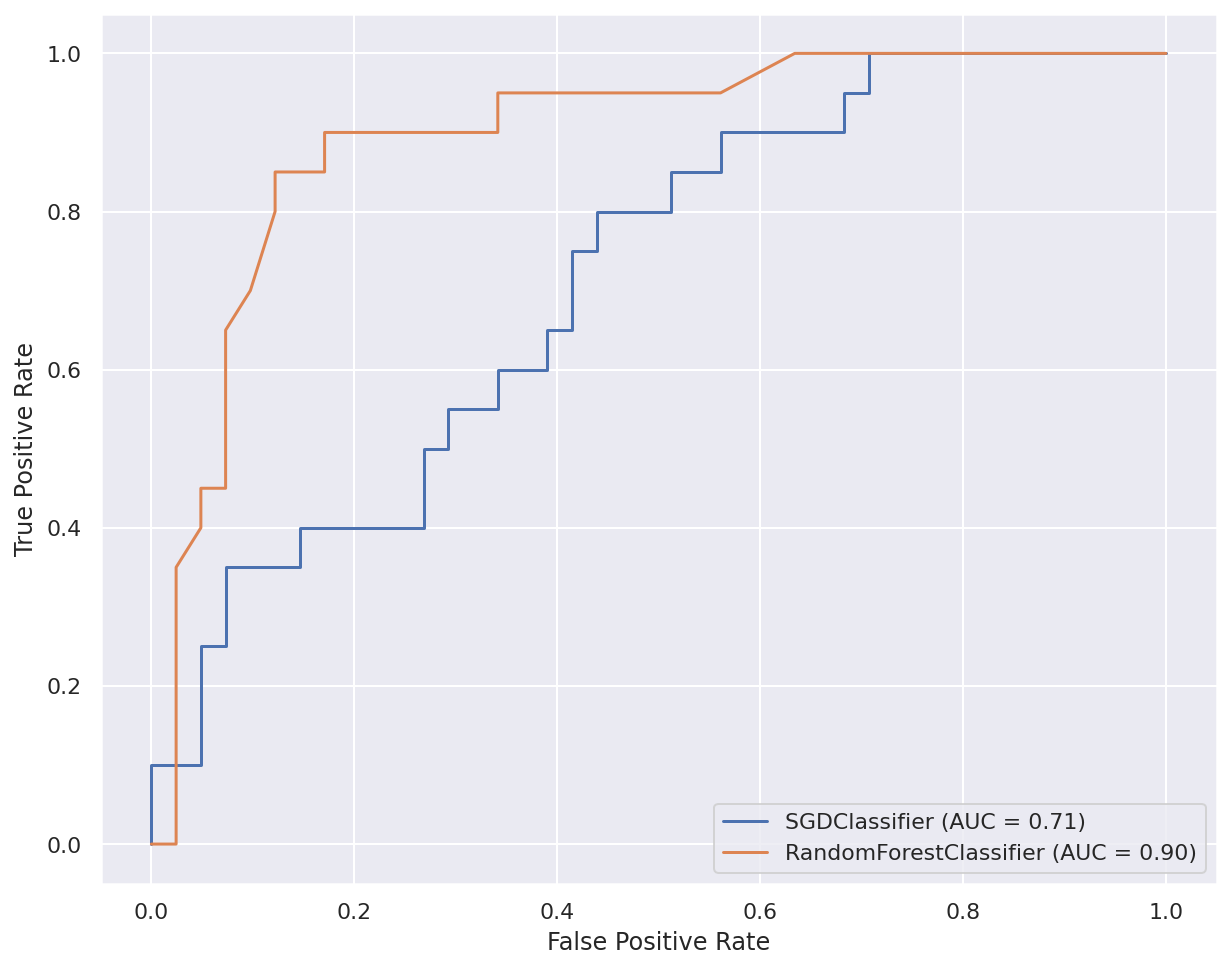

In [24]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
plot_roc_curve(model, x_test, y_test, ax=ax)
plot_roc_curve(model2, x_test, y_test, ax = ax);